In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the data
data_for_lstm = pd.read_csv("modeling_data_2.csv")
data_for_lstm = data_for_lstm.drop(columns=['Date'])

# Define target variable - using Wholesale
target = data_for_lstm['Retail']

# Define features - excluding target variable
features = data_for_lstm.drop(columns=['Wholesale', 'Retail'])

# Split into train, validation, and test sets (80/10/10 split)
train_size = int(len(features) * 0.8)
val_size = int(len(features) * 0.1)
train_X, train_y = features[:train_size], target[:train_size]
val_X, val_y = features[train_size:train_size + val_size], target[train_size:train_size + val_size]
test_X, test_y = features[train_size + val_size:], target[train_size + val_size:]

# Initialize the scaler
scaler_features = StandardScaler()
scaler_target = StandardScaler()

# Fit and transform the scaler on the training data
train_X_scaled = scaler_features.fit_transform(train_X)
train_y_scaled = scaler_target.fit_transform(train_y.values.reshape(-1, 1))

# Only transform the validation and test data
val_X_scaled = scaler_features.transform(val_X)
val_y_scaled = scaler_target.transform(val_y.values.reshape(-1, 1))
test_X_scaled = scaler_features.transform(test_X)
test_y_scaled = scaler_target.transform(test_y.values.reshape(-1, 1))


print(f"Train X shape: {train_X_scaled.shape}, Train y shape: {train_y_scaled.shape}")
print(f"Validation X shape: {val_X_scaled.shape}, Validation y shape: {val_y_scaled.shape}")
print(f"Test X shape: {test_X_scaled.shape}, Test y shape: {test_y_scaled.shape}")


Train X shape: (16344, 10), Train y shape: (16344, 1)
Validation X shape: (2043, 10), Validation y shape: (2043, 1)
Test X shape: (2044, 10), Test y shape: (2044, 1)


In [4]:
train_X.columns

Index(['Year', 'Year_sin', 'Year_cos', 'Wholesale_lag_7', 'Retail_lag_7',
       'Wholesale_rolling_mean_7d', 'Retail_rolling_mean_7d',
       'Wholesale_rolling_std_7d', 'Retail_rolling_std_7d', 'County_2'],
      dtype='object')

In [2]:
import joblib

# Save the scalers
scaler_features_path = "models/scaler_retail_features.pkl"
scaler_target_path = "models/scaler_retail_target.pkl"

# Save the feature and target scalers
joblib.dump(scaler_features, scaler_features_path)
joblib.dump(scaler_target, scaler_target_path)

print(f"Feature scaler saved to {scaler_features_path}")
print(f"Target scaler saved to {scaler_target_path}")

Feature scaler saved to models/scaler_retail_features.pkl
Target scaler saved to models/scaler_retail_target.pkl


In [3]:
n_timesteps = 20  # 20-day window
n_features = train_X.shape[1]  # Number of features in the dataset

# Reshape data into 3D arrays for LSTM
def reshape_for_multistep_lstm(X, y, n_timesteps, forecast_horizon):
    X_lstm, y_lstm = [], []
    for i in range(n_timesteps, len(X) - forecast_horizon + 1):
        X_lstm.append(X[i - n_timesteps:i])
        y_lstm.append(y[i:i + forecast_horizon])
    return np.array(X_lstm), np.array(y_lstm)

# For 20-day prediction
forecast_horizon = 20
train_X_lstm, train_y_lstm = reshape_for_multistep_lstm(train_X_scaled, train_y_scaled, n_timesteps, forecast_horizon)
val_X_lstm, val_y_lstm = reshape_for_multistep_lstm(val_X_scaled, val_y_scaled, n_timesteps, forecast_horizon)
test_X_lstm, test_y_lstm = reshape_for_multistep_lstm(test_X_scaled, test_y_scaled, n_timesteps, forecast_horizon)


print(f"Train X shape: {train_X_lstm.shape}, Train y shape: {train_y_lstm.shape}")
print(f"Validation X shape: {val_X_lstm.shape}, Validation y shape: {val_y_lstm.shape}")
print(f"Test X shape: {test_X_lstm.shape}, Test y shape: {test_y_lstm.shape}")

Train X shape: (16305, 20, 10), Train y shape: (16305, 20, 1)
Validation X shape: (2004, 20, 10), Validation y shape: (2004, 20, 1)
Test X shape: (2005, 20, 10), Test y shape: (2005, 20, 1)


Epoch 1/50

Epoch 1: val_loss improved from inf to 2.00795, saving model to models\best_retail_model_sequence.h5
510/510 - 30s - loss: 1.3906 - val_loss: 2.0079 - lr: 5.0000e-05 - 30s/epoch - 59ms/step
Epoch 2/50


c:\Users\Hp\anaconda3\envs\env_2\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 2.00795 to 1.88384, saving model to models\best_retail_model_sequence.h5
510/510 - 12s - loss: 1.2779 - val_loss: 1.8838 - lr: 5.0000e-05 - 12s/epoch - 23ms/step
Epoch 3/50

Epoch 3: val_loss improved from 1.88384 to 1.76048, saving model to models\best_retail_model_sequence.h5
510/510 - 11s - loss: 1.1769 - val_loss: 1.7605 - lr: 5.0000e-05 - 11s/epoch - 21ms/step
Epoch 4/50

Epoch 4: val_loss improved from 1.76048 to 1.66053, saving model to models\best_retail_model_sequence.h5
510/510 - 11s - loss: 1.0947 - val_loss: 1.6605 - lr: 5.0000e-05 - 11s/epoch - 21ms/step
Epoch 5/50

Epoch 5: val_loss improved from 1.66053 to 1.58791, saving model to models\best_retail_model_sequence.h5
510/510 - 11s - loss: 1.0339 - val_loss: 1.5879 - lr: 5.0000e-05 - 11s/epoch - 22ms/step
Epoch 6/50

Epoch 6: val_loss improved from 1.58791 to 1.53330, saving model to models\best_retail_model_sequence.h5
510/510 - 10s - loss: 0.9864 - val_loss: 1.5333 - lr: 5.0000e-05 - 10s

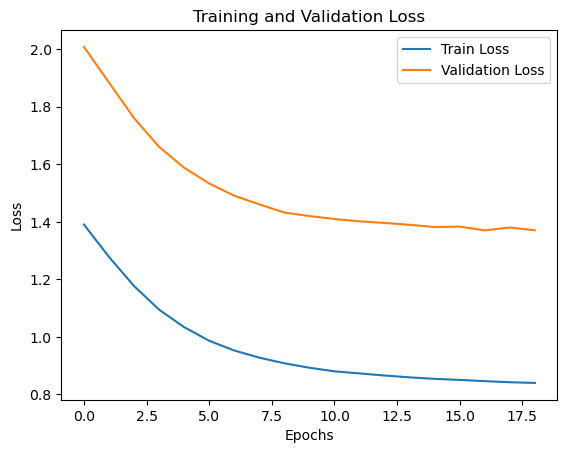

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Build the LSTM model
def build_lstm_model(n_timesteps, n_features, forecast_horizon):
    model = Sequential()
    
    # First LSTM layer with reduced units and L2 regularization
    model.add(LSTM(16, activation='tanh', return_sequences=True, 
                   kernel_regularizer=l2(0.01), input_shape=(n_timesteps, n_features)))
    model.add(Dropout(0.4))  # Dropout to prevent overfitting
    
    # Second LSTM layer with reduced units
    model.add(LSTM(16, activation='tanh', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.4))
    
    # Dense layer before output
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))  # Dropout on dense layer
    
    # Output layer
    model.add(Dense(forecast_horizon))
    model.compile(optimizer=Adam(learning_rate=0.00005), loss='mean_squared_error')  # Reduced learning rate
    return model

# Define the model
model = build_lstm_model(n_timesteps, n_features, forecast_horizon)

# Training parameters
epochs = 50  # Maximum number of epochs
batch_size = 32  # Batch size for gradient updates

# Early stopping configuration
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=2,  # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Restore the best weights after stopping
)

# Model checkpoint to save the best model based on validation loss
checkpoint = ModelCheckpoint('models/best_retail_model_sequence.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Learning rate reduction on plateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-7)

# Train the model with callbacks
history = model.fit(
    train_X_lstm, train_y_lstm,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(val_X_lstm, val_y_lstm),
    callbacks=[early_stopping, checkpoint, reduce_lr],
    verbose=2
)
# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Make predictions on the validation set
predictions = model.predict(val_X_lstm)

# Reshape the predictions to be 2D (samples, forecast_horizon)
predictions_reshaped = predictions.reshape(predictions.shape[0], forecast_horizon)

# Reshape the true values (val_y_lstm) to be 2D as well
val_y_reshaped = val_y_lstm.reshape(val_y_lstm.shape[0], forecast_horizon)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(val_y_reshaped, predictions_reshaped))
print(f"Validation RMSE: {rmse}")

# Calculate MAPE
mape = mean_absolute_percentage_error(val_y_reshaped, predictions_reshaped)
print(f"Validation MAPE: {mape}%")

63/63 [==============================] - 4s 19ms/step
Validation RMSE: 1.1580037917254868
Validation MAPE: 1.0566194636062256%
